<a href="https://colab.research.google.com/github/AlejandroSM2003/IA_N1/blob/main/Proyecto_Final_AlejandroSalinasMartinez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alejandro Salinas Martínez 1955879 IMTC

# **Introducción**
Este proyecto consiste en el entrenamiento de una red neuronal convolucional la cual pueda detectar una cara feliz o triste, se utilizó un dataset de Kaggle para su funcionamiento.

In [ ]:
import tensorflow as tf
import os
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mp
import cv2
import imghdr
import os
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data_dir = 'data'
os.listdir('/kaggle/input/data111111/data')
data_dir = '/kaggle/input/data111111/data'
data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/data111111/data')
data_iterator=data.as_numpy_iterator()
batch=data_iterator.next()



Found 305 files belonging to 2 classes.


Tamaño del batch

In [ ]:
batch[0].shape

(32, 256, 256, 3)

**Ejemplos de imágenes**

Gente triste=1 , Gente Feliz=0




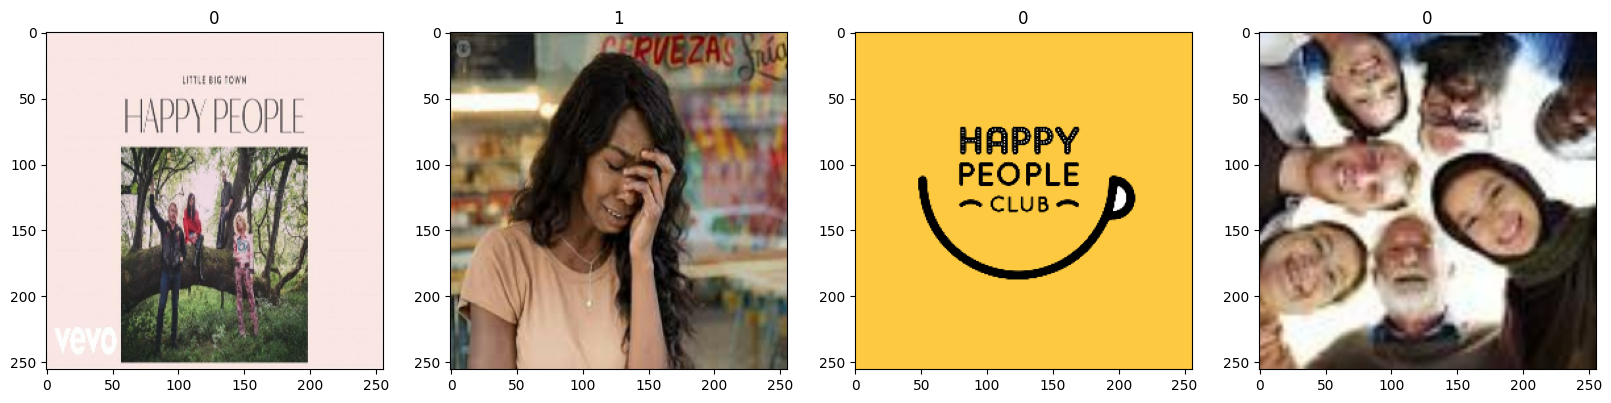

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

**Optimización**

Con esto nos permite que los valores que nos arrojan sean en decimales.

In [ ]:
data=data.map(lambda x,y: (x/255, y))
escalado=data.as_numpy_iterator()
batch=escalado.next()

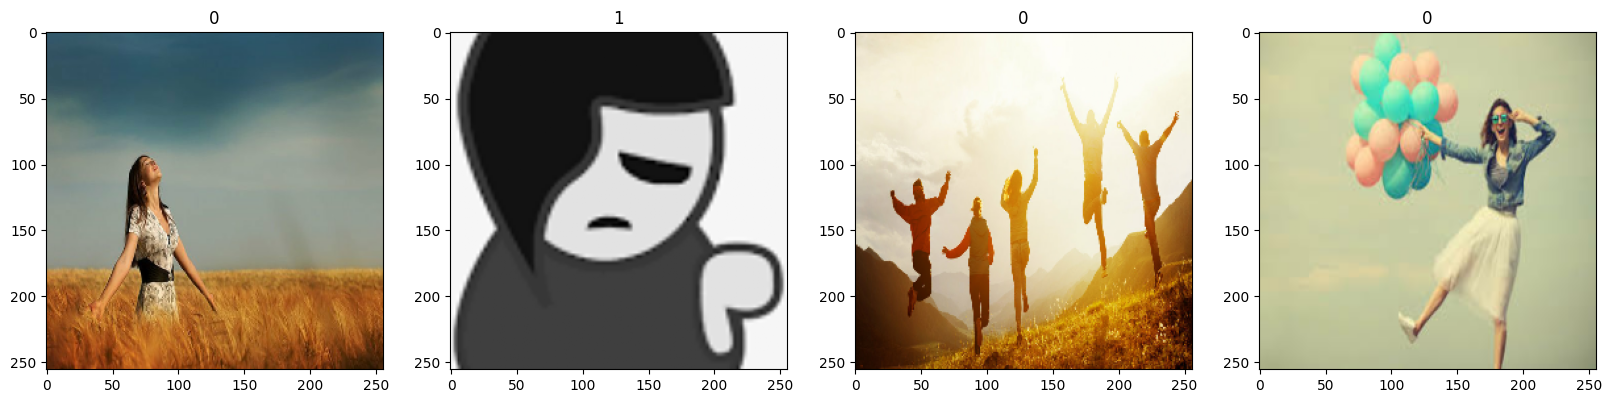

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
batch[0]

array([[[[2.12752759e-01, 3.65693927e-01, 4.24517453e-01],
         [2.14422494e-01, 3.67363662e-01, 4.26187187e-01],
         [2.16674328e-01, 3.69615495e-01, 4.28439021e-01],
         ...,
         [1.91539243e-01, 3.52323562e-01, 4.30754930e-01],
         [1.93144917e-01, 3.53929222e-01, 4.32360590e-01],
         [1.97066486e-01, 3.57850790e-01, 4.36282158e-01]],

        [[1.93550855e-01, 3.46492022e-01, 4.05315578e-01],
         [1.93847626e-01, 3.46788794e-01, 4.05612320e-01],
         [1.97472423e-01, 3.50413591e-01, 4.09237146e-01],
         ...,
         [1.74640015e-01, 3.35424334e-01, 4.06012565e-01],
         [1.74343243e-01, 3.35127562e-01, 4.05715793e-01],
         [1.78428173e-01, 3.39212477e-01, 4.09800708e-01]],

        [[2.00000003e-01, 3.45389098e-01, 4.15540755e-01],
         [2.00061962e-01, 3.45451057e-01, 4.15602714e-01],
         [2.03921571e-01, 3.49310666e-01, 4.19462323e-01],
         ...,
         [1.72985598e-01, 3.33769917e-01, 4.04358149e-01],
         [

In [ ]:
len(data)

10

# Preprocesamiento

En la siguiente sección se dividen las imágenes en grupo de entrenamiento, grupo de validación y grupo de entrenamiento.

En este caso se dividió las imágenes de esta manera:
Entrenamiento-70        Validación-20           Entrenamiento-10

In [ ]:
train_size=int(len(data)*0.7)
val_size=int(len(data)*0.2)
test_size=int(len(data)*0.1)


In [ ]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Estructura y entrenamiento de Red Neuronal Artificial Convolucional (RNAC)

En esta sección se establece la cantidad de capas de convolución y capas de aprendizaje para nuestra red neuronal artificial convolucional.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten,Dropout



In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'] )

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 16)       

In [ ]:
logdir='/content/sample_data/Logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
7/7 [==============================] - 9s 1s/step - loss: 1.1188 - accuracy: 0.4777 - val_loss: 0.6774 - val_accuracy: 0.5156
Epoch 2/20
7/7 [==============================] - 9s 1s/step - loss: 0.6765 - accuracy: 0.6116 - val_loss: 0.6520 - val_accuracy: 0.5938
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 0.6033 - accuracy: 0.7411 - val_loss: 0.4750 - val_accuracy: 0.8281
Epoch 4/20
7/7 [==============================] - 8s 1s/step - loss: 0.4738 - accuracy: 0.7946 - val_loss: 0.5325 - val_accuracy: 0.6719
Epoch 5/20
7/7 [==============================] - 9s 1s/step - loss: 0.4233 - accuracy: 0.8259 - val_loss: 0.3839 - val_accuracy: 0.9219
Epoch 6/20
7/7 [==============================] - 8s 1s/step - loss: 0.3298 - accuracy: 0.8884 - val_loss: 0.1885 - val_accuracy: 0.9531
Epoch 7/20
7/7 [==============================] - 9s 1s/step - loss: 0.2253 - accuracy: 0.9152 - val_loss: 0.1429 - val_accuracy: 0.9844
Epoch 8/20
7/7 [=========================

# Resultados de exactitud de la RNAC






Como se puede observar en la siguiente sección se muestran las gráficas correspondientes a los valores de precisión de la red neuronal y el valor final obtenido.

Gráficas

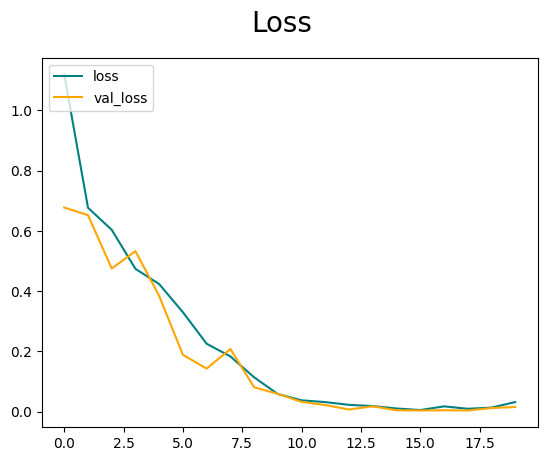

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

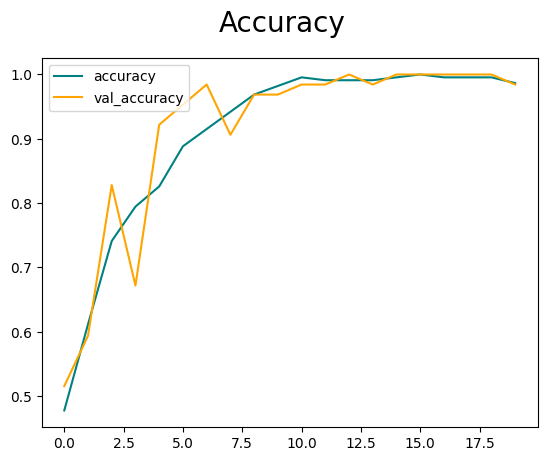

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluación

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 112ms/step


In [ ]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')


Precision:1.0,Recall:1.0, Accuracy:1.0


# **Predicciones con la RNAC entrenada.**

Predicción 1

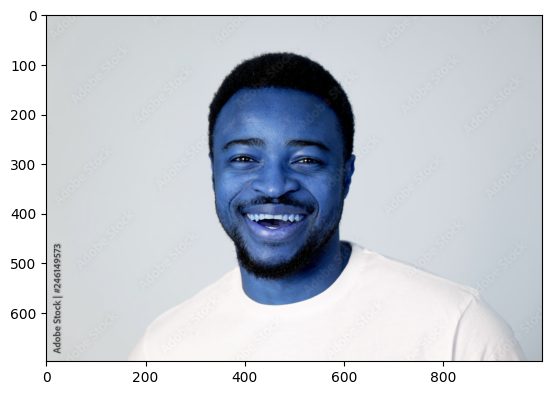

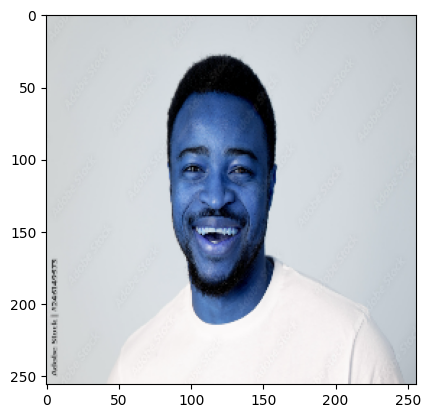

1/1 [==============================] - 0s 28ms/step
Predicted class is Happy


In [ ]:
import cv2
img = cv2.imread('/kaggle/input/sad-and-happy-face-detection/data/happy/1000_F_246149573_1dbnEopMZjSflWG4ZvojXhVVV8cTewTW.jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat
if yhat > 0.5:
    print(f'Predicted class is Happy')
else:
    print(f' Predicted class is Sad')

Predicción 2

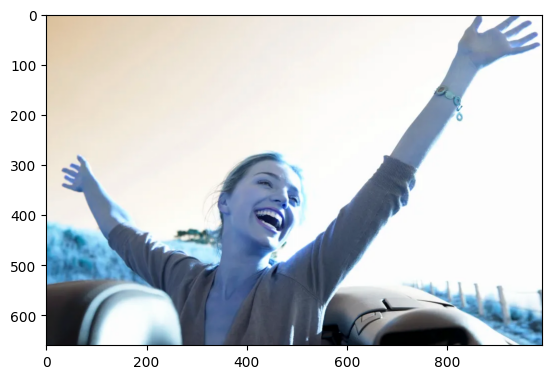

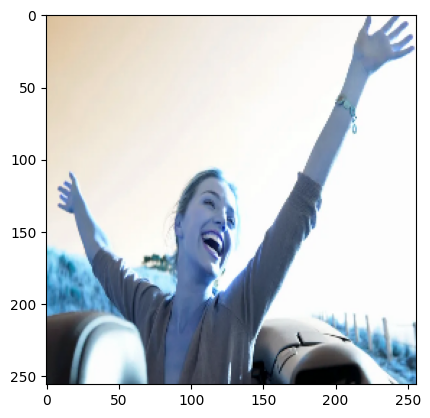

1/1 [==============================] - 0s 26ms/step
Predicted class is Happy


In [ ]:
import cv2
img = cv2.imread('/kaggle/input/1111111/2.webp')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat
if yhat > 0.5:
    print(f'Predicted class is Happy')
else:
    print(f' Predicted class is Sad')

Predicción 3

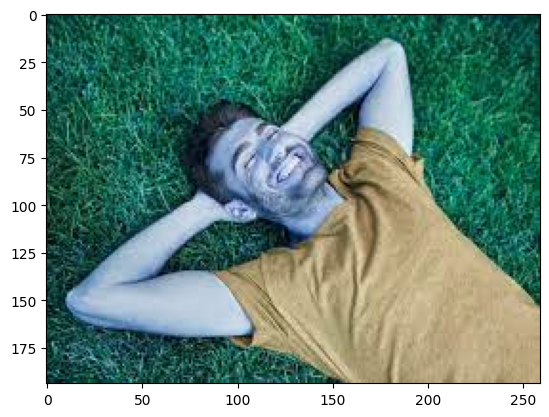

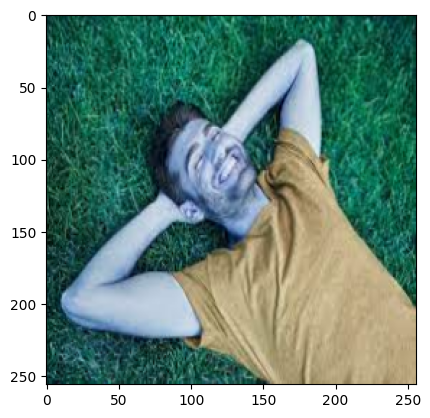

1/1 [==============================] - 0s 31ms/step
Predicted class is Happy


In [ ]:
import cv2
img = cv2.imread('/kaggle/input/1111111/4.jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat
if yhat > 0.5:
    print(f'Predicted class is Happy')
else:
    print(f' Predicted class is Sad')

Predicción 4

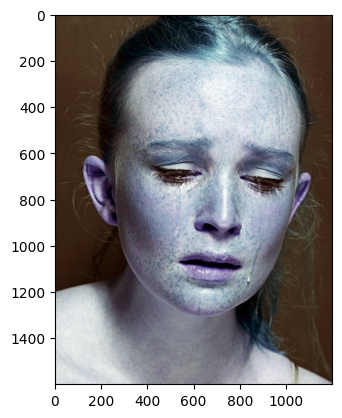

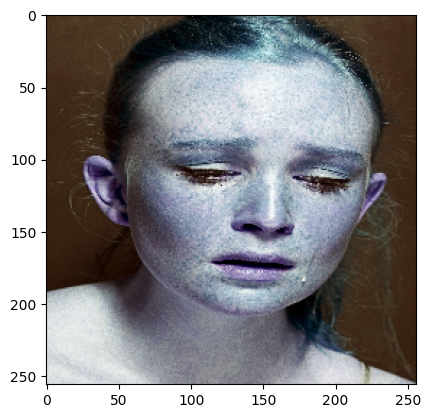

1/1 [==============================] - 0s 27ms/step
 Predicted class is Sad


In [ ]:
import cv2
img = cv2.imread('/kaggle/input/sad-and-happy-face-detection/data/sad/5cae9de385588a93b522eb8adc459a98.jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat
if yhat > 0.5:
    print(f'Predicted class is Happy')
else:
    print(f' Predicted class is Sad')

Predicción 5

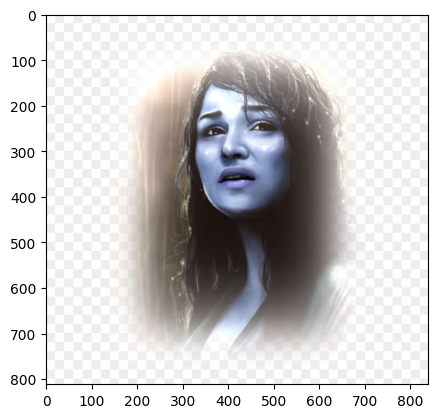

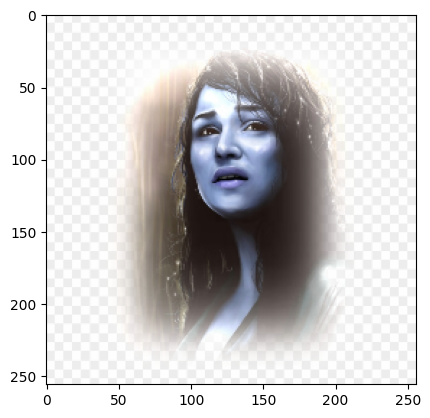

1/1 [==============================] - 0s 30ms/step
 Predicted class is Sad


In [ ]:
import cv2
img = cv2.imread('/kaggle/input/sad-and-happy-face-detection/data/sad/476-4764880_woman-sad-girl-people-face-portrait-black-ftestickers.png')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat
if yhat > 0.5:
    print(f'Predicted class is Happy')
else:
    print(f' Predicted class is Sad')

Predicción 6

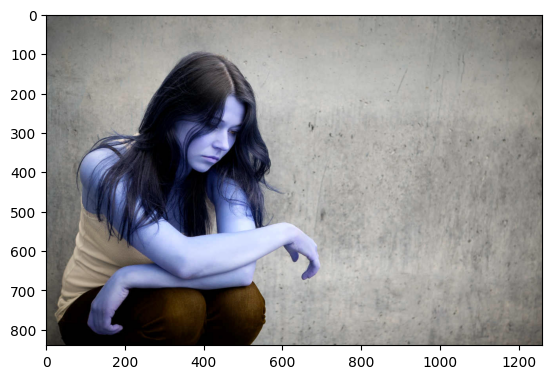

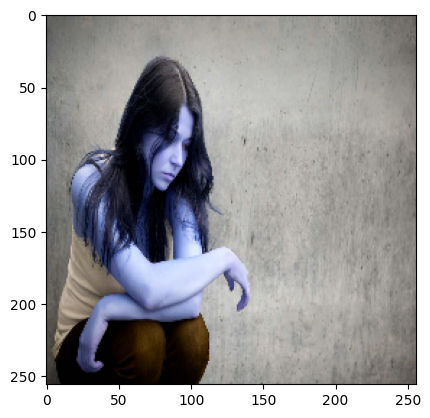

1/1 [==============================] - 0s 28ms/step
 Predicted class is Sad


In [ ]:
import cv2
img = cv2.imread('/kaggle/input/1111111/10.jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat
if yhat > 0.5:
    print(f'Predicted class is Happy')
else:
    print(f' Predicted class is Sad')

Predicción 7

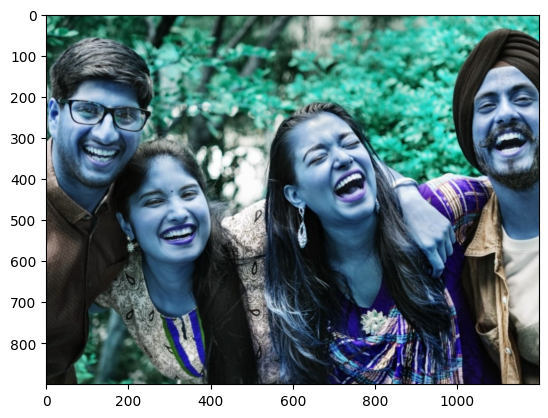

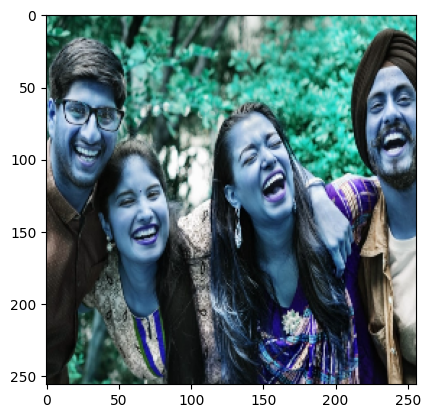

1/1 [==============================] - 0s 29ms/step
Predicted class is Happy


In [ ]:
import cv2
img = cv2.imread('/kaggle/input/sad-and-happy-face-detection/data/happy/1_617fd1e2590c2.jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat
if yhat > 0.5:
    print(f'Predicted class is Happy')
else:
    print(f' Predicted class is Sad')

Predicción 8

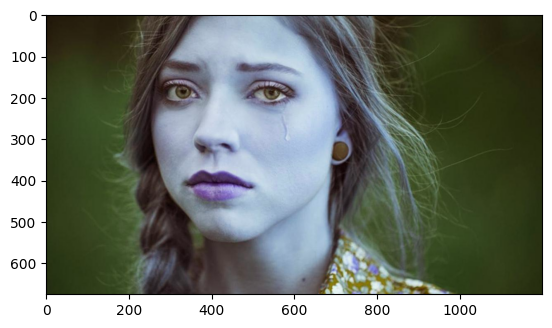

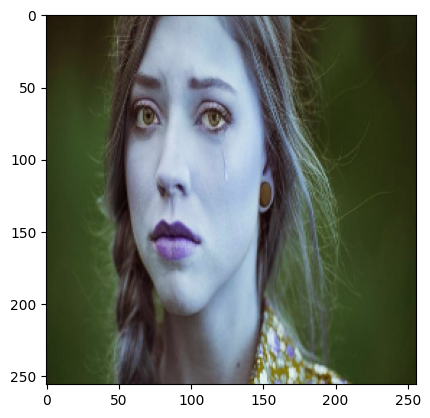

1/1 [==============================] - 0s 27ms/step
 Predicted class is Sad


In [ ]:
import cv2
img = cv2.imread('/kaggle/input/1111111/9.jpeg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat
if yhat > 0.5:
    print(f'Predicted class is Happy')
else:
    print(f' Predicted class is Sad')

Predicción 9

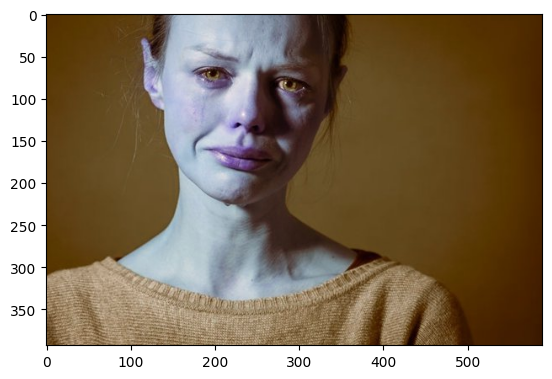

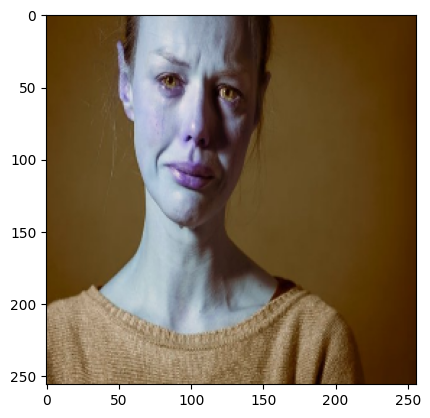

1/1 [==============================] - 0s 28ms/step
 Predicted class is Sad


In [ ]:
import cv2
img = cv2.imread('/kaggle/input/1111111/11.jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat
if yhat > 0.5:
    print(f'Predicted class is Happy')
else:
    print(f' Predicted class is Sad')

Predicción 10

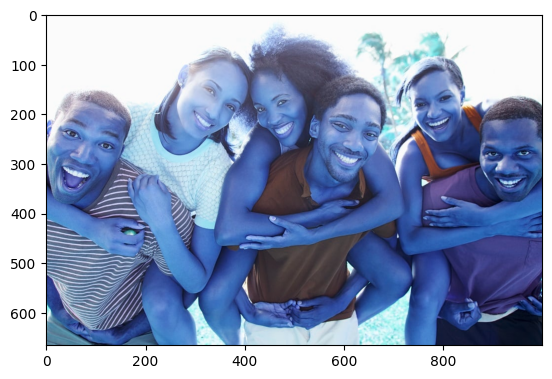

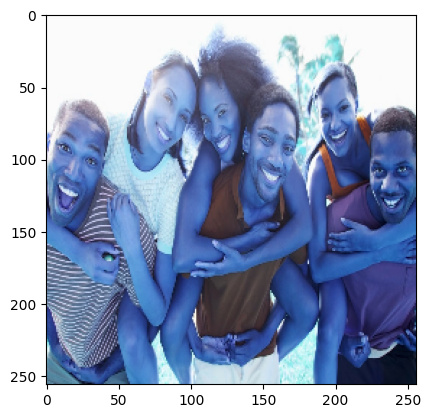

1/1 [==============================] - 0s 32ms/step
Predicted class is Happy


In [ ]:
import cv2
img = cv2.imread('/kaggle/input/sad-and-happy-face-detection/data/happy/Dollarphotoclub_76084977-1.jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat
if yhat > 0.5:
    print(f'Predicted class is Happy')
else:
    print(f' Predicted class is Sad')